Autores: 
- Pablo Escobar 
- Eduardo 
- Mariana David 201055

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Especifica la ubicación de tu archivo .xlsx
archivo_excel = 'data.xlsx'

# Carga los datos desde el archivo .xlsx en un DataFrame
data = pd.read_excel(archivo_excel)

print(data.head())

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

In [4]:
print(data.columns)


Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Especifica la ubicación de tu archivo .xlsx
archivo_excel = 'data.xlsx'

# Carga los datos desde el archivo .xlsx en un DataFrame
data = pd.read_excel(archivo_excel, header=0, skiprows=[0])  # Especifica header=0 para usar la primera fila como cabecera de columnas

# Ahora, puedes trabajar con los datos en el DataFrame 'data'

# Separar características (X) y etiquetas (Y)
X = data.drop(columns=['default payment next month'])
Y = data['default payment next month']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Modelo

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos desde un archivo (asegúrate de que tu archivo 'data.xlsx' esté en la misma carpeta)
archivo_excel = 'data.xlsx'
data = pd.read_excel(archivo_excel)

# Separar características (X) y etiquetas (Y)
X = data.iloc[1:, 1:-1].values.astype(float)  # Excluir la primera fila con nombres de columna y la última columna de etiquetas
Y = data.iloc[1:, -1].values.astype(int)  # Excluir la primera fila con nombres de columna

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Puedes ajustar la tasa de aprendizaje según sea necesario
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=200, batch_size=128, validation_data=(X_val, Y_val), verbose=2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy * 100:.2f}%')


Epoch 1/200
165/165 - 2s - loss: 0.5983 - accuracy: 0.7272 - val_loss: 0.5236 - val_accuracy: 0.7858 - 2s/epoch - 15ms/step
Epoch 2/200
165/165 - 1s - loss: 0.5454 - accuracy: 0.7809 - val_loss: 0.5043 - val_accuracy: 0.8009 - 980ms/epoch - 6ms/step
Epoch 3/200
165/165 - 1s - loss: 0.5231 - accuracy: 0.7886 - val_loss: 0.4883 - val_accuracy: 0.8022 - 1s/epoch - 7ms/step
Epoch 4/200
165/165 - 1s - loss: 0.5102 - accuracy: 0.7977 - val_loss: 0.4761 - val_accuracy: 0.8064 - 995ms/epoch - 6ms/step
Epoch 5/200
165/165 - 1s - loss: 0.5010 - accuracy: 0.7984 - val_loss: 0.4690 - val_accuracy: 0.8060 - 950ms/epoch - 6ms/step
Epoch 6/200
165/165 - 1s - loss: 0.4918 - accuracy: 0.8012 - val_loss: 0.4681 - val_accuracy: 0.8071 - 972ms/epoch - 6ms/step
Epoch 7/200
165/165 - 1s - loss: 0.4854 - accuracy: 0.8034 - val_loss: 0.4607 - val_accuracy: 0.8078 - 998ms/epoch - 6ms/step
Epoch 8/200
165/165 - 1s - loss: 0.4824 - accuracy: 0.8059 - val_loss: 0.4583 - val_accuracy: 0.8104 - 951ms/epoch - 6ms/st

Accura: 82

In [7]:
# Construir el modelo CNN
model = keras.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_val, Y_val))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy * 100:.2f}%')

Epoch 1/50
329/329 [==============================] - 4s 8ms/step - loss: 0.4654 - accuracy: 0.8078 - val_loss: 0.4531 - val_accuracy: 0.8084
Epoch 2/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4494 - accuracy: 0.8136 - val_loss: 0.4462 - val_accuracy: 0.8151
Epoch 3/50
329/329 [==============================] - 2s 7ms/step - loss: 0.4425 - accuracy: 0.8162 - val_loss: 0.4464 - val_accuracy: 0.8156
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4404 - accuracy: 0.8164 - val_loss: 0.4438 - val_accuracy: 0.8142
Epoch 5/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4391 - accuracy: 0.8185 - val_loss: 0.4406 - val_accuracy: 0.8140
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4383 - accuracy: 0.8181 - val_loss: 0.4468 - val_accuracy: 0.8104
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4364 - accuracy: 0.8175 - val_loss: 0.4422 - val_accuracy: 0.8136
Epoch 

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos desde un archivo (asegúrate de que tu archivo 'data.xlsx' esté en la misma carpeta)
archivo_excel = 'data.xlsx'
data = pd.read_excel(archivo_excel)

# Separar características (X) y etiquetas (Y)
X = data.iloc[1:, 1:-1].values.astype(float)  # Excluir la primera fila con nombres de columna y la última columna de etiquetas
Y = data.iloc[1:, -1].values.astype(int)  # Excluir la primera fila con nombres de columna

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.6),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Puedes ajustar la tasa de aprendizaje según sea necesario
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=300, batch_size=256, validation_data=(X_val, Y_val), verbose=2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy * 100:.2f}%')


Epoch 1/300
83/83 - 4s - loss: 0.5950 - accuracy: 0.7426 - val_loss: 0.5413 - val_accuracy: 0.7856 - 4s/epoch - 45ms/step
Epoch 2/300
83/83 - 2s - loss: 0.5561 - accuracy: 0.7749 - val_loss: 0.5259 - val_accuracy: 0.7962 - 2s/epoch - 28ms/step
Epoch 3/300
83/83 - 2s - loss: 0.5390 - accuracy: 0.7793 - val_loss: 0.5072 - val_accuracy: 0.8020 - 2s/epoch - 27ms/step
Epoch 4/300
83/83 - 2s - loss: 0.5226 - accuracy: 0.7872 - val_loss: 0.4937 - val_accuracy: 0.8047 - 2s/epoch - 27ms/step
Epoch 5/300
83/83 - 2s - loss: 0.5095 - accuracy: 0.7925 - val_loss: 0.4849 - val_accuracy: 0.8042 - 2s/epoch - 26ms/step
Epoch 6/300
83/83 - 2s - loss: 0.4981 - accuracy: 0.7981 - val_loss: 0.4761 - val_accuracy: 0.8040 - 2s/epoch - 27ms/step
Epoch 7/300
83/83 - 2s - loss: 0.4991 - accuracy: 0.8030 - val_loss: 0.4755 - val_accuracy: 0.8029 - 2s/epoch - 26ms/step
Epoch 8/300
83/83 - 2s - loss: 0.4893 - accuracy: 0.8010 - val_loss: 0.4742 - val_accuracy: 0.8029 - 2s/epoch - 28ms/step
Epoch 9/300
83/83 - 2s -

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos desde un archivo (asegúrate de que tu archivo 'data.xlsx' esté en la misma carpeta)
archivo_excel = 'data.xlsx'
data = pd.read_excel(archivo_excel)

# Separar características (X) y etiquetas (Y)
X = data.iloc[1:, 1:-1].values.astype(float)  # Excluir la primera fila con nombres de columna y la última columna de etiquetas
Y = data.iloc[1:, -1].values.astype(int)  # Excluir la primera fila con nombres de columna

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con más épocas
history = model.fit(X_train, Y_train, epochs=500, batch_size=128, validation_data=(X_val, Y_val), verbose=2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy on test data: {test_accuracy * 100:.2f}%')


Grafica

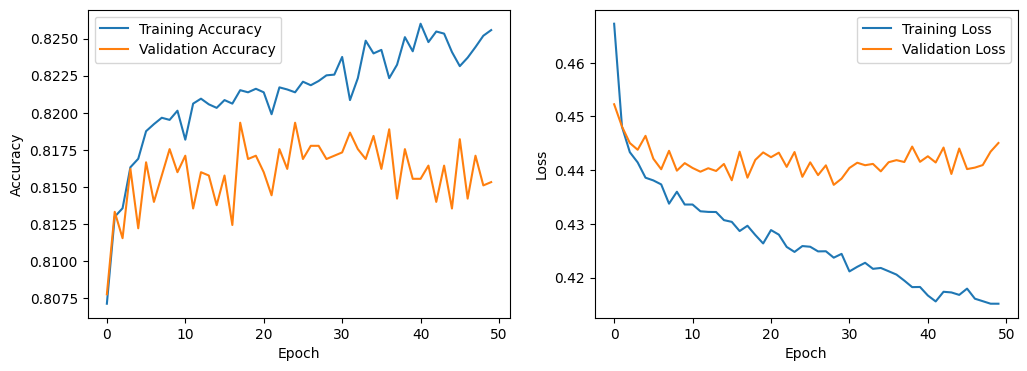

In [11]:
# Visualizar la precisión y la pérdida a lo largo del entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
import sys
print(sys.executable)


c:\Users\Mariana\AppData\Local\Programs\Python\Python311-32\python.exe
